In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [4]:
warnings.filterwarnings("ignore")

In [5]:
# Importing the dataset
data = pd.read_csv('./Restaurant_Reviews.tsv', sep='\t')

In [6]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [8]:
data.shape

(1000, 2)

In [9]:
# Checking for missing values
data.isnull().sum()

Review    0
Liked     0
dtype: int64

In [10]:

data.Liked.value_counts()

Liked
1    500
0    500
Name: count, dtype: int64

In [12]:
#counting the number of characters in each review
data['char_count'] = data['Review'].apply(len)

In [13]:
data.head()

,Review,Liked,char_count
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [14]:
data['word_count'] = data['Review'].apply(lambda x: len(x.split()))

In [15]:
data.head()

,Review,Liked,char_count,word_count
0,Wow... Loved this place.,1,24,4
1,Crust is not good.,0,18,4
2,Not tasty and the texture was just nasty.,0,41,8
3,Stopped by during the late May bank holiday of...,1,87,15
4,The selection on the menu was great and so wer...,1,59,12


In [16]:
import nltk

In [17]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Faheem\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
data['sentence_count'] = data['Review'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [20]:
import re

In [21]:
data['Review'][1]

'Crust is not good.'

In [24]:

# Removing special characters
review = re.sub(r'\W', ' ', data['Review'][0])
review

'Wow    Loved this place '

In [25]:
review = review.lower()

In [26]:
review = review.split()

In [29]:
review

['wow', 'loved', 'this', 'place']

In [31]:
from nltk.corpus import stopwords

In [32]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [43]:
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
additional_stopwords = ['don', "don't", 'ain', 'aren', "aren't", 'couldn', "couldn't",
                        'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't",
                        'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', 
                        "mustn't", 'needn', "needn't", 'shan', "shan't", 'no', 'nor', 'not', 
                        'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', 
                        "won't", 'wouldn', "wouldn't"]
stop_words = set(all_stopwords) - set(additional_stopwords)

In [35]:
# Removing stopwords from the review
for word in review:
    if word in all_stopwords:
        review.remove(word)

In [36]:
review

['wow', 'loved', 'place']

In [38]:
from nltk.stem import PorterStemmer

In [39]:
ps = PorterStemmer()

In [44]:
#creating a corpus from the reviews
corpus = []
for i in range(data.shape[0]):
    review = re.sub(r'\W', ' ', data['Review'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in stop_words]
    review = ' '.join(review)
    corpus.append(review)

In [46]:
data['processed_review'] = corpus

In [47]:
data.head()

,Review,Liked,char_count,word_count,sentence_count,processed_review
0,Wow... Loved this place.,1,24,4,2,wow love place
1,Crust is not good.,0,18,4,1,crust not good
2,Not tasty and the texture was just nasty.,0,41,8,1,not tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,87,15,1,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,59,12,1,select menu great price


In [49]:
from wordcloud import WordCloud

In [50]:
wc = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(' '.join(data['processed_review']))

In [51]:
wc

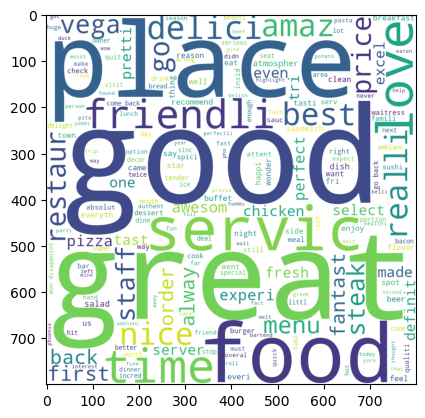

In [54]:
pos =wc.generate(' '.join(data[data['Liked'] == 1]['processed_review']))
plt.imshow(pos)

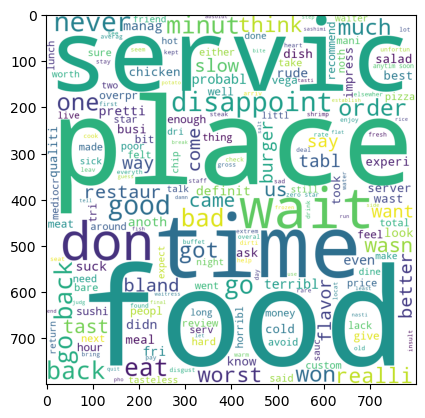

In [55]:
neg = wc.generate(' '.join(data[data['Liked'] == 0]['processed_review']))
plt.imshow(neg)

In [56]:
data.head()

,Review,Liked,char_count,word_count,sentence_count,processed_review
0,Wow... Loved this place.,1,24,4,2,wow love place
1,Crust is not good.,0,18,4,1,crust not good
2,Not tasty and the texture was just nasty.,0,41,8,1,not tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,87,15,1,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,59,12,1,select menu great price


In [57]:
from sklearn.feature_extraction.text import CountVectorizer

In [58]:
cv = CountVectorizer(max_features=1500)

In [59]:
X = cv.fit_transform(data['processed_review']).toarray()

In [60]:
X.shape

(1000, 1500)

In [65]:
y = data['Liked']
y

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 1000, dtype: int64

In [63]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [68]:
from sklearn.naive_bayes import GaussianNB

In [74]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

In [69]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [75]:
accuracy_score(y_test, y_pred)

0.73

In [79]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)
accuracy_score(y_test, y_pred)

0.81

In [80]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)
accuracy_score(y_test, y_pred)


0.82

In [81]:
import joblib

In [82]:
joblib.dump(rf, 'restaurant_review.pkl')

['restaurant_review.pkl']